<a href="https://colab.research.google.com/github/franciscomartino/MIAD-ANS-Team6/blob/main/C%C3%B3digo/Proyecto_ANS_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Problema y contexto

- Cada año y dos veces al año el Instituto Colombiano para la Evaluación de la Educación (ICFES) realiza una evaluación llamada Saber 11, cuyo público objetivo son todos los estudiantes de grado 11 y en nivel de bachillerato de Colombia.

- El examen es integral y abarca las materias: Lectura Critica, Matematicas, Ciencias Naturales, Ciencias Sociales e Inglés. Y tiene dos objetivos principales:
    - Por un lado, ser criterio de selección para la entrada de estudiantes a las instituciones de educación superior
    - Y por otro, realizar el monitoreo de la calidad de formación que ofrecen los establecimientos de educación media y dar información relevante para tomar acciones en la educación.
    
- Es de saber que las condiciones sociales, económicas y demográficas (tales como la región donde vive el estudiante, el estrato social, el poder adquisitivo de los padres, la profesión y estabilidad de los mismos) pueden afectar los resultados del examen y por ende tener impacto directo en el futuro de los jóvenes.

- Es por eso, que en el grupo 6, tenemos la motivación de realizar el siguiente proyecto que busca, a partir de los resultados y la información socio-demográfica de los estudiantes, entender esta relación y buscar segmentar (clusterizar) a los estudiantes a partir de dichas características para ver si existen diferencias marcadas entre distintos grupos de estudiantes en el país y se pueden tomar acciones diferenciadas a los mismos.

- El Cliente Potencial para este proyecto es, por un lado el mismo ICFES, dado que le permitirá entender mucho mejor los resultados y la relación de los mismos con las características socio-demográficas de los estudiantes, lo cual le puede permitir tomar acciones más efectivas y diferenciadas según las necesidades de los grupos encontrados.

- Otro cliente potencial pueden ser las instituciones de educación superior como las universidades, porque tendrán un mejor entendimiento de la realidad para ajustar sus estrategias.

- En líneas generales, consideramos que el proyecto y sus estudios posteriores pueden tener un impacto positivo en el ecosistema educativo general de Colombia, para poder contribuir en mejorar la igualdad de oportunidades y acceso a la educación de los estudiantes que los ayude a alcanzar mayor éxito y calidad de vida en el futuro.

- El problema planteado pertenece al ámbito del Aprendizaje no supervisado, debido a que no conocemos de antemano los segmentos de estudiantes, sino que tenemos un grupo de características y resultados de los mismos que nos permitirán ahondar en el análisis y modelamiento analítico con miras a generar dichos grupos o segme. En lineas generales utilizaremos técnicas analíticas de clustering.

A continuación procedemos a explicar a detalle la metodología, resultados y conclusiones del proyecto.


# Análisis preliminar

**Carga de los datos**

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)



DIMENSIONES 

Dimensiones:  15528  filas y  78 columnas

COLUMNAS 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15528 entries, 0 to 15527
Data columns (total 78 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             15528 non-null  object 
 1   ESTU_NACIONALIDAD              15528 non-null  object 
 2   ESTU_GENERO                    15523 non-null  object 
 3   ESTU_FECHANACIMIENTO           15528 non-null  object 
 4   PERIODO                        15528 non-null  int64  
 5   ESTU_CONSECUTIVO               15528 non-null  object 
 6   ESTU_ESTUDIANTE                15528 non-null  object 
 7   ESTU_PAIS_RESIDE               15528 non-null  object 
 8   ESTU_TIENEETNIA                13837 non-null  object 
 9   ESTU_DEPTO_RESIDE              15520 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          15520 non-null  float64
 11  ESTU_MCPIO_RESIDE              15520 

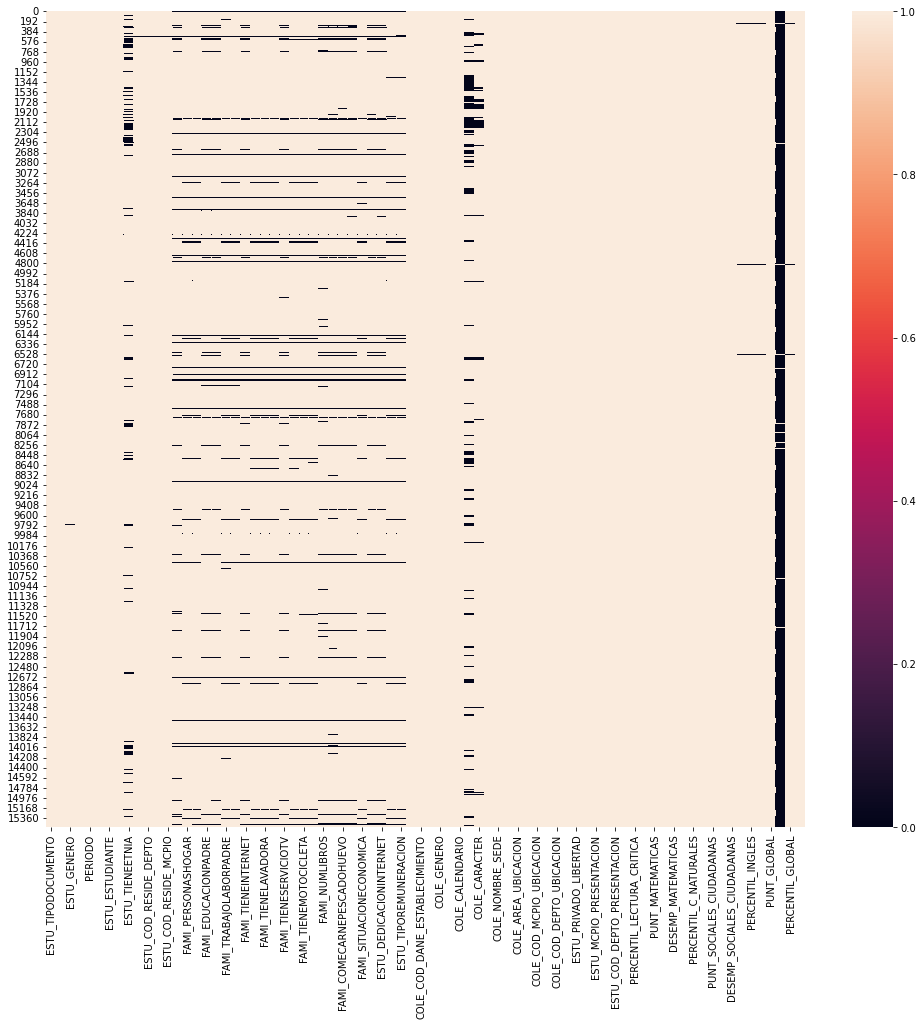

In [ ]:
# your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# parte a
#/content/drive/MyDrive/Data/MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO.csv
#datos = pd.read_csv('/content/drive/MyDrive/Data/MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO.csv')
url = 'https://raw.githubusercontent.com/franciscomartino/MIAD-ANS-Team6/main/Data/SB11_20211.txt'
datos = pd.read_csv(url, sep="¬")
datos = pd.DataFrame(datos)
datos.head()

# Dimensiones de los datos:
print("\nDIMENSIONES \n")
print("Dimensiones: ", datos.shape[0], " filas y ", datos.shape[1], "columnas")

# Columnas
print("\nCOLUMNAS \n")
print(datos.info())

# Datos faltantes
print("\nDATOS FALTANTES \n")
null_columns = datos.columns[datos.isnull().any()]
print(null_columns)

print("\nCantidad de datos faltantes por columna\n")
print(datos[null_columns].isnull().sum().sort_values(ascending=False))
f, ax = plt.subplots(figsize=(17,15))
ax = sns.heatmap(datos.notna())

In [ ]:
def edad(fec):
  born = datetime.strptime(fec, "%d/%m/%Y").date()
  today = datetime.strptime('01/01/2021', "%d/%m/%Y").date()
  return today.year - born.year - ((today.month, today.day) <(born.month,born.day))

datos['Edad'] = datos['ESTU_FECHANACIMIENTO'].apply(edad)
datos = datos[(datos['Edad']>10) & (datos['Edad']<100)].copy()

In [ ]:
# Selección preliminar de variables a analizar
cols = ["ESTU_GENERO", "Edad", "PERIODO","ESTU_TIENEETNIA", "ESTU_DEPTO_RESIDE", "FAMI_ESTRATOVIVIENDA",
      "FAMI_TIENEINTERNET", "ESTU_HORASSEMANATRABAJA", "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES",
      "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES", "PUNT_GLOBAL"]


In [ ]:
# Estadísticas descriptivas para las variables numéricas
datos[cols].describe().T
#pd.pivot_table(datos, values='PERIODO', index=['Edad'], aggfunc='count')

,count,mean,std,min,25%,50%,75%,max
Edad,13971.0,17.146446,2.930407,11.0,16.0,17.0,17.0,70.0
PERIODO,13971.0,20211.000000,0.000000,20211.0,20211.0,20211.0,20211.0,20211.0
PUNT_LECTURA_CRITICA,13971.0,61.005297,11.223772,0.0,54.0,63.0,69.0,100.0
PUNT_MATEMATICAS,13971.0,60.663088,13.523836,15.0,52.0,62.0,70.0,100.0
PUNT_C_NATURALES,13971.0,57.496099,11.392316,0.0,50.0,58.0,66.0,100.0
PUNT_SOCIALES_CIUDADANAS,13971.0,57.632882,13.053231,0.0,49.0,59.0,67.0,100.0
PUNT_INGLES,13925.0,67.602873,17.132135,0.0,55.0,70.0,81.0,100.0
PUNT_GLOBAL,13971.0,299.199198,57.990029,22.0,260.0,306.0,343.0,495.0


In [ ]:
# Estadísticas descriptivas para las variables categóricas
datos[cols].describe(include=['O']).T

,count,unique,top,freq
ESTU_GENERO,13966,2,M,7026
ESTU_TIENEETNIA,12289,2,No,12157
ESTU_DEPTO_RESIDE,13963,29,VALLE,6263
FAMI_ESTRATOVIVIENDA,13267,7,Estrato 3,3173
FAMI_TIENEINTERNET,13342,2,Si,12952
ESTU_HORASSEMANATRABAJA,13471,5,0,10261


**Análisis gráfico**

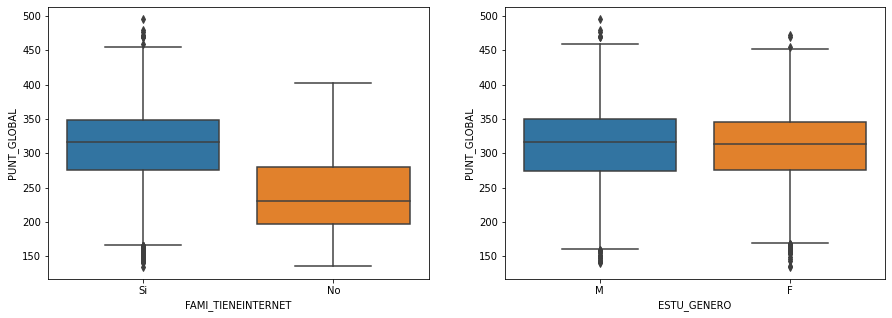

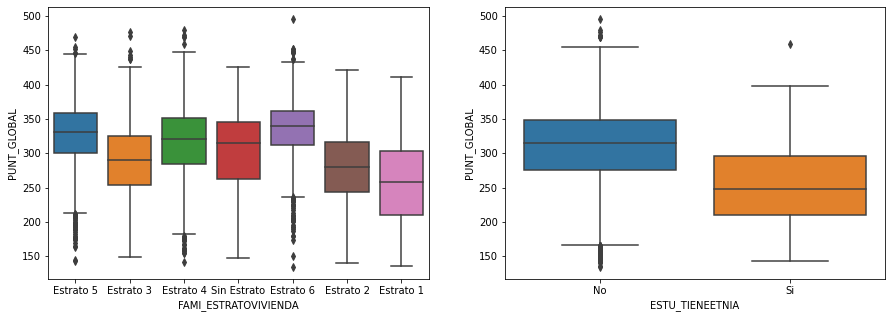

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig2, axs2 = plt.subplots(1, 2, figsize=(15, 5))

df_clean = datos[cols].dropna()

## Análisis por genero vs puntaje global
sns.boxplot(ax = axs[1],
            y = "PUNT_GLOBAL",  # Establecemos la varible a la que le queremos sacar el diagrama de caja.
            x = "ESTU_GENERO",            # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            data = df_clean
            ); 

## Análisis por internet vs puntaje global
sns.boxplot(ax = axs[0],
            y = "PUNT_GLOBAL",  # Establecemos la varible a la que le queremos sacar el diagrama de caja.
            x = "FAMI_TIENEINTERNET",            # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            data = df_clean
            ); 

## Análisis por etnias vs puntaje global
sns.boxplot(ax = axs2[1],
            y = "PUNT_GLOBAL",  # Establecemos la varible a la que le queremos sacar el diagrama de caja.
            x = "ESTU_TIENEETNIA",            # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            data = df_clean
            ); 

## Análisis por estrato vs puntaje global
sns.boxplot(ax = axs2[0],
            y = "PUNT_GLOBAL",  # Establecemos la varible a la que le queremos sacar el diagrama de caja.
            x = "FAMI_ESTRATOVIVIENDA",            # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            data = df_clean
            ); 

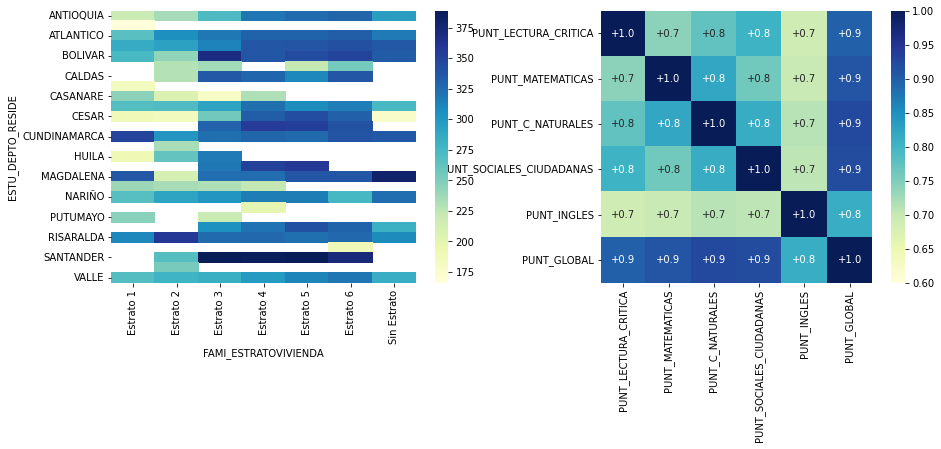

In [ ]:
fig1, axs1 = plt.subplots(1, 2, figsize=(15, 5))
## Análisis del puntaje global por depto y estrato
y = pd.pivot_table(df_clean, values="PUNT_GLOBAL", index=["ESTU_DEPTO_RESIDE"], columns=["FAMI_ESTRATOVIVIENDA"], aggfunc=np.mean)
mapa_calor = sns.heatmap(y,                      # Utilizamos la base de datos de vuelos.
                         annot = False,               # Mostramos las anotaciones.
                         #fmt = "d"                    # Ajustamos el formato de los números.
                         ax = axs1[0],
                         cmap="YlGnBu"
                         )  


## Análisis de la correlación entre el puntaje global y las pruebas particulares 
cols_corr = ["PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES","PUNT_SOCIALES_CIUDADANAS", 
             "PUNT_INGLES", "PUNT_GLOBAL"]

sns.heatmap(df_clean[cols_corr].corr(), cmap="YlGnBu", annot=True, square=True,
    vmin=0.6, vmax=1, fmt="+.1f", ax = axs1[1])

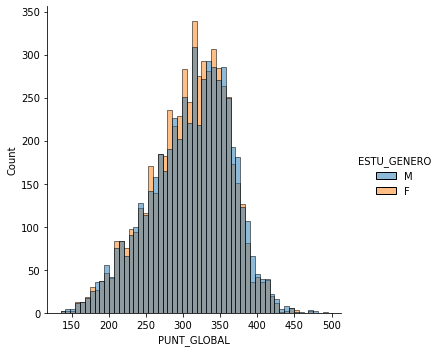

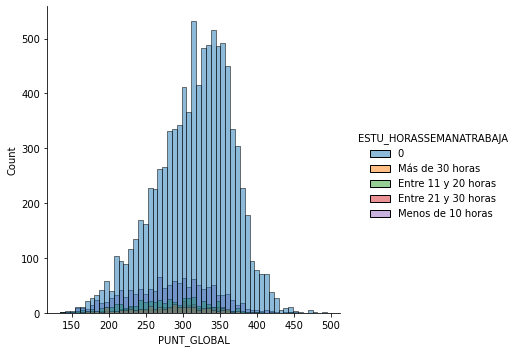

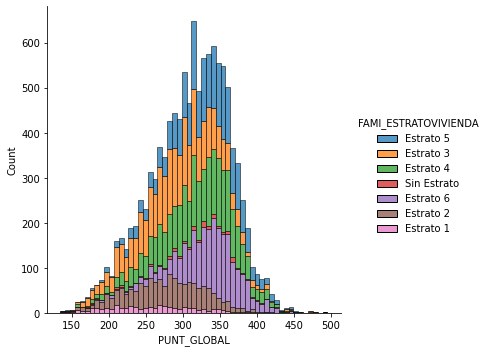

In [ ]:
## Análisis por género vs puntaje global
sns.displot(data = df_clean,             # Utilizamos la base de datos de pingüinos.
            x = "PUNT_GLOBAL",      # Establecemos la varible a la que le queremos sacar el histograma.
            hue = "ESTU_GENERO"              # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            # multiple = "stack"      # Apilamos las barras.
            )   

## Análisis por trabaja vs puntaje global
sns.displot(data = df_clean,             # Utilizamos la base de datos de pingüinos.
            x = "PUNT_GLOBAL",      # Establecemos la varible a la que le queremos sacar el histograma.
            hue = "ESTU_HORASSEMANATRABAJA"              # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            # multiple = "stack"      # Apilamos las barras.
            )   

## Análisis por estrato vs puntaje global
sns.displot(data = df_clean,             # Utilizamos la base de datos de pingüinos.
            x = "PUNT_GLOBAL",      # Establecemos la varible a la que le queremos sacar el histograma.
            hue = "FAMI_ESTRATOVIVIENDA",            # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            multiple = "stack"      # Apilamos las barras.
            )


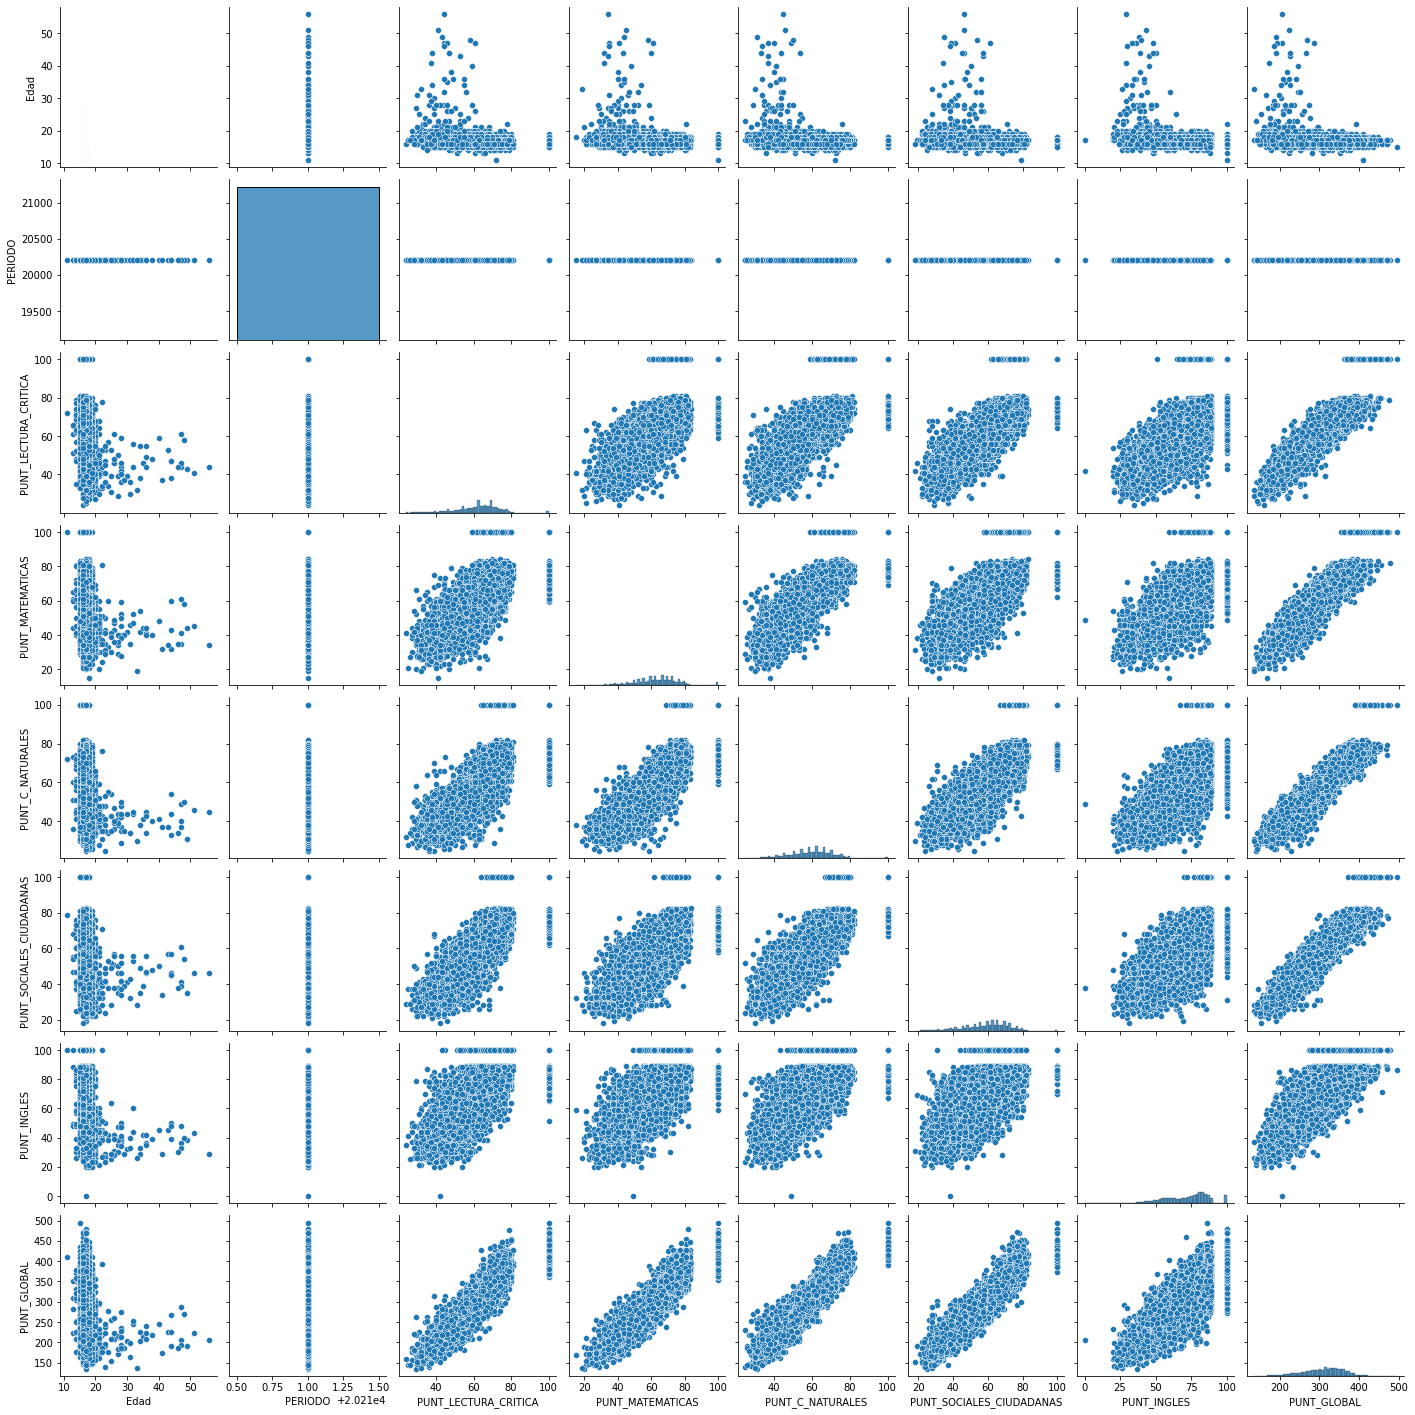

In [ ]:
# Análisis de las variables cuantitativas
#print("\nVARIABLES CUANTITATIVAS \n")
sns.pairplot(df_clean)

**Selección de variables**

In [ ]:
#### Francisco: desde acá agregué código para el avance de la Semana 5
df_clean = datos[cols].dropna()
#df_clean = df_clean.drop(columns=['PERIODO'])
df_clean = df_clean.drop(columns=['PUNT_GLOBAL','PERIODO'])
#df_clean = df_clean.drop(columns=['PERIODO','ESTU_GENERO', 'Edad', 'ESTU_TIENEETNIA', 'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET','ESTU_HORASSEMANATRABAJA'])
#df_clean = df_clean.drop(columns=['PERIODO','ESTU_GENERO', 'Edad', 'ESTU_TIENEETNIA', 'FAMI_TIENEINTERNET','ESTU_HORASSEMANATRABAJA','ESTU_DEPTO_RESIDE'])

col_renombradas = ['Genero', 'Edad','Etnia', 'Departamento', 'Estrato', 'Internet','HorasLaborales','PuntajeLectura','PuntajeMatematicas','PuntajeNaturales','PuntajeSociales','PuntajeIngles'] # ['Estrato', 'PuntajeLectura','PuntajeMatematicas','PuntajeNaturales','PuntajeSociales','PuntajeIngles'] #['Genero', 'Edad', 'Etnia', 'Departamento', 'Estrato', 'Internet','HorasLaborales','PuntajeLectura','PuntajeMatematicas','PuntajeNaturales','PuntajeSociales','PuntajeIngles']
df_clean.columns = col_renombradas 
df_clean.head()

,Genero,Edad,Etnia,Departamento,Estrato,Internet,HorasLaborales,PuntajeLectura,PuntajeMatematicas,PuntajeNaturales,PuntajeSociales,PuntajeIngles
0,M,17,No,VALLE,Estrato 5,Si,0,63,62,61,56,61.0
1,F,16,No,VALLE,Estrato 3,Si,0,65,70,63,61,69.0
2,F,17,No,VALLE,Estrato 3,Si,Más de 30 horas,100,66,62,73,69.0
3,F,17,No,VALLE,Estrato 4,Si,Entre 11 y 20 horas,62,55,54,53,60.0
4,F,16,No,VALLE,Estrato 5,Si,0,57,67,53,53,60.0


In [ ]:
# Vemos cuántas filas y columnas tiene el dataset

print("\nDIMENSIONES \n")
print("Dimensiones: ", df_clean.shape[0], " filas y ", df_clean.shape[1], "columnas")


DIMENSIONES 

Dimensiones:  11498  filas y  12 columnas


In [ ]:
# Describimos las columnas del Dataset
print("\nCOLUMNAS \n")
print(df_clean.info())


COLUMNAS 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11498 entries, 0 to 15527
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genero              11498 non-null  object 
 1   Edad                11498 non-null  int64  
 2   Etnia               11498 non-null  object 
 3   Departamento        11498 non-null  object 
 4   Estrato             11498 non-null  object 
 5   Internet            11498 non-null  object 
 6   HorasLaborales      11498 non-null  object 
 7   PuntajeLectura      11498 non-null  int64  
 8   PuntajeMatematicas  11498 non-null  int64  
 9   PuntajeNaturales    11498 non-null  int64  
 10  PuntajeSociales     11498 non-null  int64  
 11  PuntajeIngles       11498 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB
None


In [ ]:
#Manejamos las variables categóricas

from sklearn.preprocessing import LabelEncoder

df_clean['Genero'] = LabelEncoder().fit_transform(df_clean['Genero'])
#df_clean['Periodo'] = LabelEncoder().fit_transform(df_clean['Periodo'])
df_clean['Etnia'] = LabelEncoder().fit_transform(df_clean['Etnia'])
df_clean['Departamento'] = LabelEncoder().fit_transform(df_clean['Departamento'])
df_clean['Estrato'] = LabelEncoder().fit_transform(df_clean['Estrato'])
df_clean['Internet'] = LabelEncoder().fit_transform(df_clean['Internet'])
df_clean['HorasLaborales'] = LabelEncoder().fit_transform(df_clean['HorasLaborales'])

In [ ]:
# Centramos los datos
mu = df_clean.mean()
sigma = 1#df_clean.std()
df_clean_n = (df_clean - mu)/sigma
df_clean_n.head()

,Genero,Edad,Etnia,Departamento,Estrato,Internet,HorasLaborales,PuntajeLectura,PuntajeMatematicas,PuntajeNaturales,PuntajeSociales,PuntajeIngles
0,0.505479,0.196643,-0.010089,10.146547,0.952774,0.014959,-0.506697,0.356236,-0.742999,1.688728,-3.530092,-9.588276
1,-0.494521,-0.803357,-0.010089,10.146547,-1.047226,0.014959,-0.506697,2.356236,7.257001,3.688728,1.469908,-1.588276
2,-0.494521,0.196643,-0.010089,10.146547,-1.047226,0.014959,3.493303,37.356236,3.257001,2.688728,13.469908,-1.588276
3,-0.494521,0.196643,-0.010089,10.146547,-0.047226,0.014959,0.493303,-0.643764,-7.742999,-5.311272,-6.530092,-10.588276
4,-0.494521,-0.803357,-0.010089,10.146547,0.952774,0.014959,-0.506697,-5.643764,4.257001,-6.311272,-6.530092,-10.588276


# Análisis de Componentes principales

**Extracción de las componentes principales**

In [ ]:
from sklearn.decomposition import PCA
#df_clean_n = df_clean
pca = PCA(n_components=2)
pca.fit_transform(df_clean_n)

array([[  8.35404949, -11.08012677],
       [ -3.24228495, -12.18629921],
       [-18.6467723 , -21.29223751],
       ...,
       [ 10.53664883, -13.36942935],
       [ 14.29417695,  -7.29799158],
       [-29.23853006,  -1.67806116]])

In [ ]:
# Detalle de los primeros componentes principales y sus pesos
pca.components_

array([[-9.23422666e-05,  2.82447203e-03,  4.27781905e-04,
         1.89597655e-01, -2.56666074e-02, -7.65226353e-04,
         9.95142057e-03, -3.54945884e-01, -4.43571764e-01,
        -3.75690557e-01, -4.31165765e-01, -5.59907463e-01],
       [-1.74653339e-03,  3.36497115e-02,  2.63764455e-04,
        -8.26216212e-01,  4.24512174e-02, -3.00472588e-04,
         2.16875072e-03, -2.07722926e-01, -2.15339836e-01,
        -2.07162055e-01, -2.45540166e-01,  3.48852833e-01]])

In [ ]:
#calculamos la varianza explicada con 2 componentes principales

print(pca.explained_variance_ratio_) 

[0.71106178 0.12523447]


La primera variable principal explica un 71.1% de la varianza. Esta le da mayor peso a las variables Departamento, estrato y a los puntajes de los resultados de las pruebas de Lectura, Matemáticas, Naturales, Sociales e Inglés. De manera similar, la segunda componente principal le da mayor importancia a las variables indicadas anteriormente adicionando la variable edad.

In [ ]:
#transformamos el dataset inicial para reducirlo a los 2 componentes principales
X_red = pca.transform(df_clean_n) 
X_red

array([[ -8.61711223, -12.45128277],
       [ 16.21811344, -12.23556433],
       [ 67.4395887 , -22.46211306],
       ...,
       [ -9.44156676, -15.60955537],
       [-27.56726416,  -8.33295554],
       [ 72.27938605,  -0.60814114]])

In [ ]:
# Le damos forma de dataset a los CP para poder graficarlos y entender si existen patrones

tabla = pd.DataFrame(X_red,columns=["CP1", "CP2"] )
tabla

,CP1,CP2
0,-8.617112,-12.451283
1,16.218113,-12.235564
2,67.439589,-22.462113
3,-31.130006,-8.945919
4,-24.294484,-9.967552
...,...,...
11493,-143.395170,8.368272
11494,-61.038543,-5.095326
11495,-9.441567,-15.609555
11496,-27.567264,-8.332956


In [ ]:
# Cargamos el paquete plotly para hacer gráficas interactivas y graficamos los dos CP
import plotly.express as px 

fig = px.scatter(tabla, x = "CP1", y = "CP2",
    text = tabla.index.values)
fig.update_traces(textposition = 'top center')

# Análisis de clústers

**Configuración de parámetros óptimos - kmeans**

In [ ]:
# Numero de Clusters
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn_extra.cluster import KMedoids 
from sklearn.metrics import silhouette_score

#Primero para kmeans

Z = {}

varianza_intra_cluster = []
silhouettes = []
for k in range (1, 10): # Evaluamos entre 1 a 20 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123).fit(X_red)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(X_red, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Z[k] = kmeans.labels_

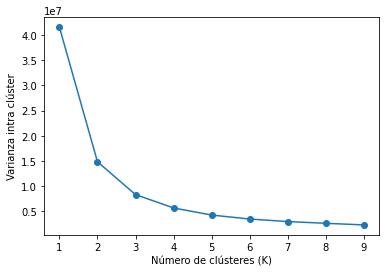

In [ ]:
plt.plot(range(1, 10), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

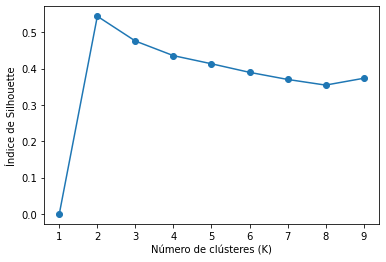

In [ ]:
plt.plot(range(1, 10), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

**Configuración de parámetros óptimos - kmedoides**

In [ ]:
# Ahora para Kmedoides
Z = {}

varianza_intra_cluster = []
silhouettes = []
for k in range (1, 10): # Evaluamos entre 1 a 20 clusters posibles
    Kmedoides = KMedoids(n_clusters = k, random_state = 123).fit(X_red)
    varianza_intra_cluster.append(Kmedoides.inertia_)
    try:
        silhouette = silhouette_score(X_red, Kmedoides.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Z[k] = kmeans.labels_


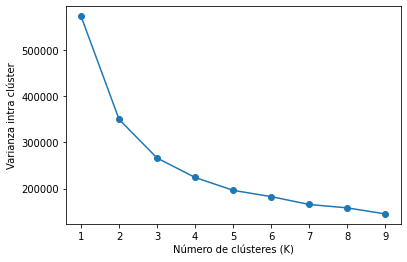

In [ ]:
plt.plot(range(1, 10), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

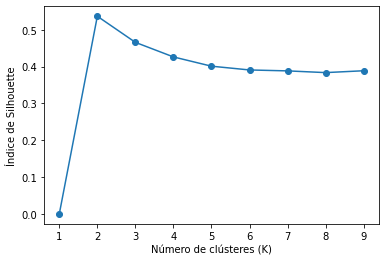

In [ ]:
plt.plot(range(1, 10), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

**Configuración de parámetros óptimos - dbscan**

1.883210196362395


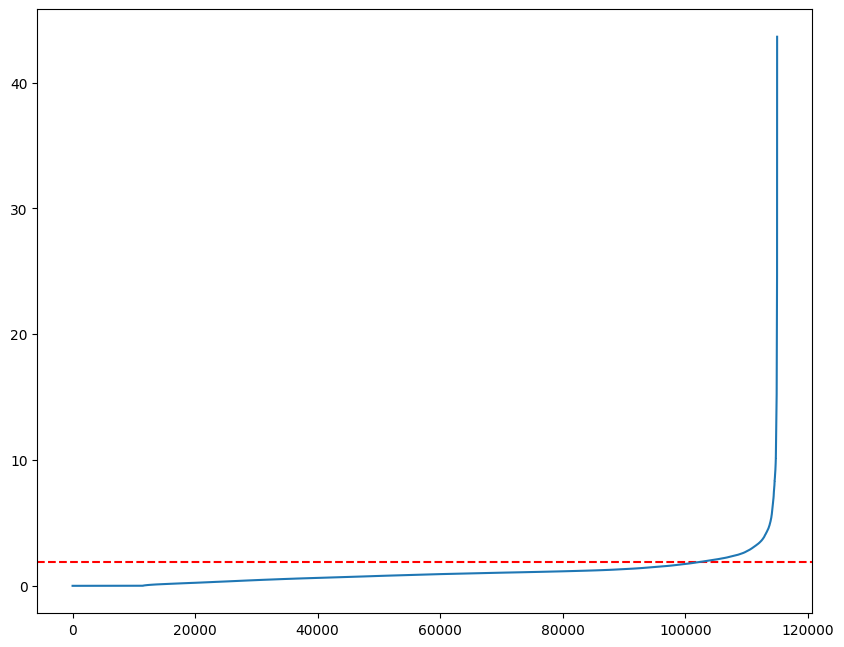

In [ ]:
# Cargamos NeighborsNeighbors
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(X_red)
distancias, indices = nbrs.kneighbors(X_red)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 1.9, color = 'r', linestyle = '--')
plt.plot(distancias)

from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])

**Gráfico de los clústers - kmeans**

In [ ]:
#Corremos kmeans para k=2
kmeans_4 = KMeans(n_clusters = 2, random_state = 1234).fit(X_red)

inertia = kmeans_4.inertia_
silhouette = silhouette_score(X_red, kmeans_4.labels_)

print("La varianza inter-cluster es: " + str(inertia))
print("El índice de silhouette: " + str(silhouette))

La varianza inter-cluster es: 14852208.468746385
El índice de silhouette: 0.54406846637544


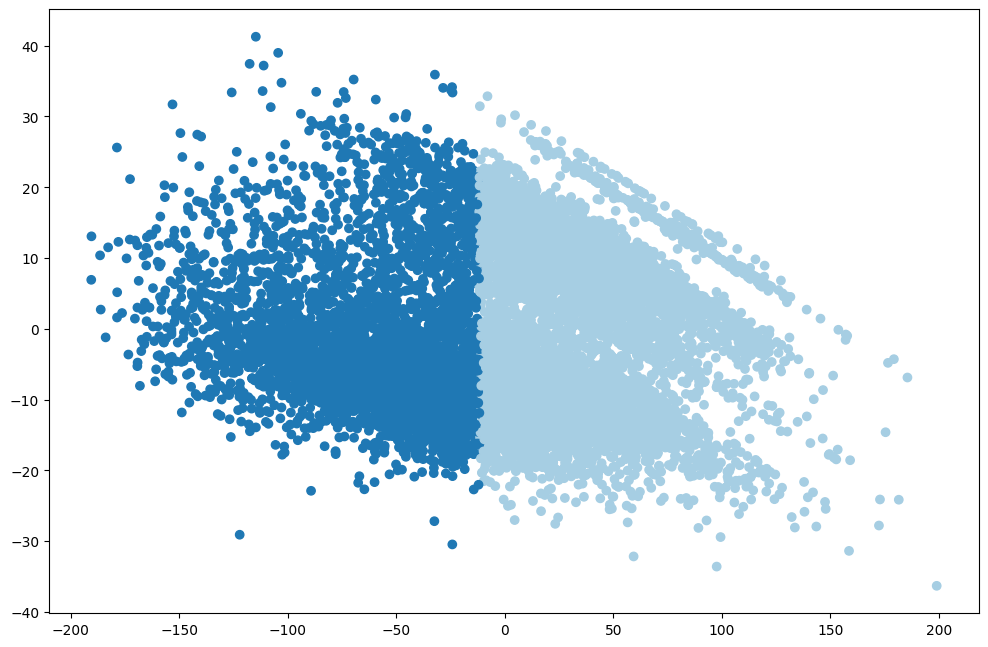

In [ ]:
#kmeans: gráfica
digitos_plot = pd.DataFrame({"X": X_red[:, 0], "Y": X_red[:, 1], "Dígito": df_clean.index}).reset_index(drop = True)

y_pred = kmeans_4.labels_.astype(int) #Kmedoides4
color = [sns.color_palette("Paired", 40)[k] for k in y_pred]

fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
ax.scatter(X_red[:, 0], X_red[:, 1], c = color)
#for i, txt in enumerate(digitos_plot["Dígito"]):
#       plt.text(digitos_plot["X"][i], digitos_plot["Y"][i], 
#                digitos_plot["Dígito"][i], fontsize = 7)
plt.show()

**Gráfico de los clústers - kmediodes**

In [ ]:
#Corremos kmedoides para k=2
Kmedoides4 = KMedoids(n_clusters = 2, random_state = 321).fit(X_red)

inertia = Kmedoides4.inertia_
silhouette = silhouette_score(X_red, Kmedoides4.labels_)

print("La varianza inter-cluster es: " + str(inertia))
print("El índice de silhouette: " + str(silhouette))

La varianza inter-cluster es: 349794.04790811054
El índice de silhouette: 0.5367127592707966


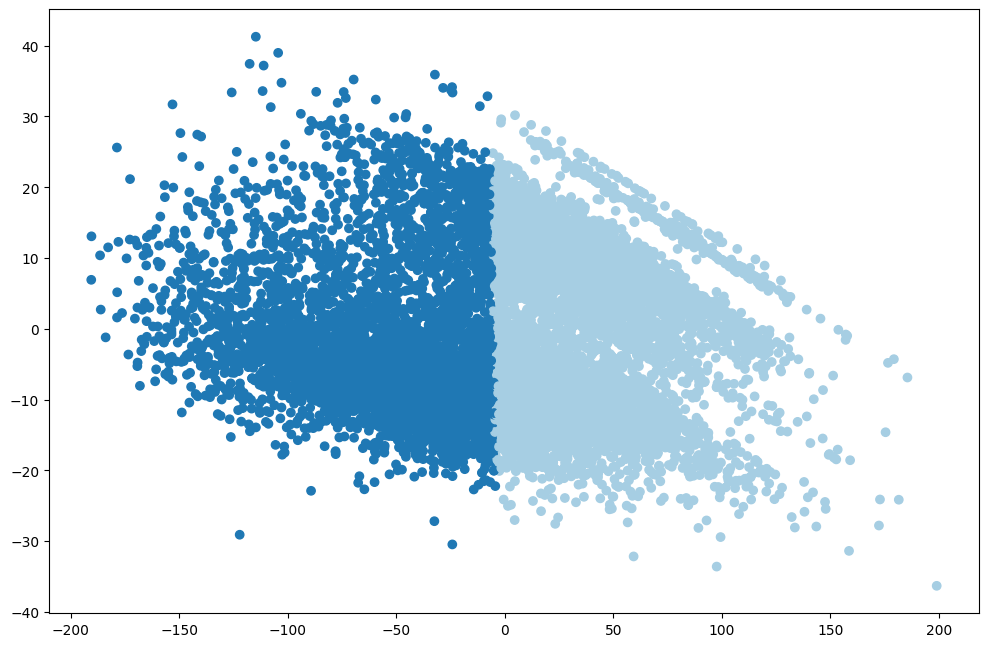

In [ ]:
#kmedoides: gráfica
digitos_plot = pd.DataFrame({"X": X_red[:, 0], "Y": X_red[:, 1], "Dígito": df_clean.index}).reset_index(drop = True)

y_pred_ = Kmedoides4.labels_.astype(int) #Kmedoides4
color = [sns.color_palette("Paired", 40)[k] for k in y_pred_]

fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
ax.scatter(X_red[:, 0], X_red[:, 1], c = color)
#for i, txt in enumerate(digitos_plot["Dígito"]):
#       plt.text(digitos_plot["X"][i], digitos_plot["Y"][i], 
#                digitos_plot["Dígito"][i], fontsize = 7)
plt.show()

**Gráfico de los clústers - DBSCAN**

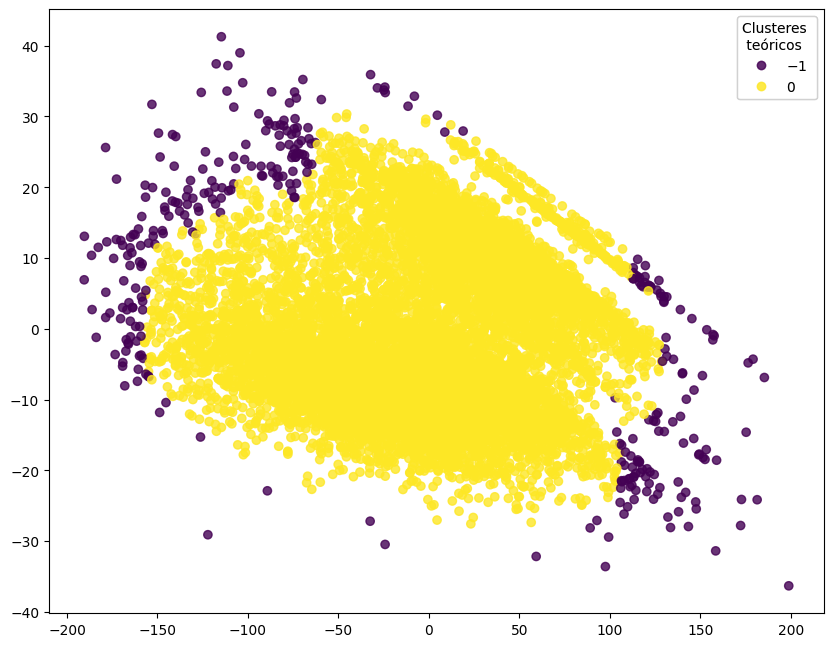

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=6.0, min_samples=30)
clusters=db.fit_predict(X_red)


fig, ax = plt.subplots(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
g = plt.scatter(X_red[:,0], X_red[:,1], c = clusters, alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres \n teóricos")
ax.add_artist(legend)
plt.show()


# Análisis de resultados

**Clúster generado por kmeans**

In [ ]:
# Analisis de resultados
df_clean_an = datos[cols].dropna()
df_clean_an = df_clean_an.drop(columns=['PUNT_GLOBAL','PERIODO'])
#df_clean_an = df_clean_an.drop(columns=['PERIODO','ESTU_GENERO', 'Edad', 'ESTU_TIENEETNIA', 'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET','ESTU_HORASSEMANATRABAJA'])
#df_clean_an = df_clean_an.drop(columns=['PERIODO','ESTU_GENERO', 'Edad', 'ESTU_TIENEETNIA', 'FAMI_TIENEINTERNET','ESTU_HORASSEMANATRABAJA','ESTU_DEPTO_RESIDE'])

#col_renombradas = ['Genero', 'Edad', 'Etnia', 'Departamento', 'Estrato', 'Internet','HorasLaborales','PuntajeLectura','PuntajeMatematicas','PuntajeNaturales','PuntajeSociales','PuntajeIngles']
#df_clean_an.columns = col_renombradas 

df_clean_an['cluster_kmean'] = pd.DataFrame(y_pred)

# Estadísticas del grupo 1
df_clean_an[df_clean_an['cluster_kmean'] == 0].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ESTU_GENERO,5249,2,F,2703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edad,5249.0,NaN,NaN,NaN,16.826824,1.652187,11.0,16.0,17.0,17.0,51.0
ESTU_TIENEETNIA,5249,2,No,5214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_DEPTO_RESIDE,5249,22,VALLE,2722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_ESTRATOVIVIENDA,5249,7,Estrato 3,1231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_TIENEINTERNET,5249,2,Si,5168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_HORASSEMANATRABAJA,5249,5,0,4244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUNT_LECTURA_CRITICA,5249.0,NaN,NaN,NaN,62.741094,10.369334,25.0,57.0,64.0,70.0,100.0
PUNT_MATEMATICAS,5249.0,NaN,NaN,NaN,62.711374,12.653266,15.0,55.0,64.0,71.0,100.0
PUNT_C_NATURALES,5249.0,NaN,NaN,NaN,59.325586,10.617901,25.0,52.0,60.0,67.0,100.0


In [ ]:
# Estadísticas del grupo 2
df_clean_an[df_clean_an['cluster_kmean'] == 1].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ESTU_GENERO,3017,2,F,1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edad,3017.0,NaN,NaN,NaN,16.862446,1.861582,13.0,16.0,17.0,17.0,56.0
ESTU_TIENEETNIA,3017,2,No,2951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_DEPTO_RESIDE,3017,21,VALLE,1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_ESTRATOVIVIENDA,3017,7,Estrato 3,766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_TIENEINTERNET,3017,2,Si,2964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_HORASSEMANATRABAJA,3017,5,0,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUNT_LECTURA_CRITICA,3017.0,NaN,NaN,NaN,61.579383,10.36888,24.0,55.0,63.0,69.0,100.0
PUNT_MATEMATICAS,3017.0,NaN,NaN,NaN,61.504143,12.629885,20.0,53.0,63.0,70.0,100.0
PUNT_C_NATURALES,3017.0,NaN,NaN,NaN,58.341399,10.674786,26.0,51.0,59.0,66.0,100.0


**Clúster generado por kmediodes**

In [ ]:
df_clean_an['cluster_kmediode'] = pd.DataFrame(y_pred_)

# Estadísticas del grupo 1
df_clean_an[df_clean_an['cluster_kmediode'] == 0].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ESTU_GENERO,4915,2,F,2537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edad,4915.0,NaN,NaN,NaN,16.827467,1.643904,11.0,16.0,17.0,17.0,51.0
ESTU_TIENEETNIA,4915,2,No,4881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_DEPTO_RESIDE,4915,22,VALLE,2536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_ESTRATOVIVIENDA,4915,7,Estrato 3,1149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_TIENEINTERNET,4915,2,Si,4843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_HORASSEMANATRABAJA,4915,5,0,3977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUNT_LECTURA_CRITICA,4915.0,NaN,NaN,NaN,62.805086,10.380503,25.0,57.0,64.0,70.0,100.0
PUNT_MATEMATICAS,4915.0,NaN,NaN,NaN,62.809969,12.657285,15.0,55.0,64.0,71.0,100.0
PUNT_C_NATURALES,4915.0,NaN,NaN,NaN,59.357274,10.646641,25.0,52.0,60.0,67.0,100.0


In [ ]:
# Estadísticas del grupo 2
df_clean_an[df_clean_an['cluster_kmediode'] == 1].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ESTU_GENERO,3351,2,F,1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edad,3351.0,NaN,NaN,NaN,16.857953,1.852661,13.0,16.0,17.0,17.0,56.0
ESTU_TIENEETNIA,3351,2,No,3284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_DEPTO_RESIDE,3351,21,VALLE,1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_ESTRATOVIVIENDA,3351,7,Estrato 3,848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_TIENEINTERNET,3351,2,Si,3289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_HORASSEMANATRABAJA,3351,5,0,2635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUNT_LECTURA_CRITICA,3351.0,NaN,NaN,NaN,61.601313,10.348168,24.0,55.0,63.0,69.0,100.0
PUNT_MATEMATICAS,3351.0,NaN,NaN,NaN,61.479857,12.617642,20.0,54.0,63.0,70.0,100.0
PUNT_C_NATURALES,3351.0,NaN,NaN,NaN,58.393017,10.627076,26.0,51.0,59.0,66.0,100.0


**Clúster generado por dbscan**

In [ ]:
df_clean_an['cluster_dbscan'] = pd.DataFrame(clusters)

# Estadísticas del grupo 1
df_clean_an[df_clean_an['cluster_dbscan'] == 0].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ESTU_GENERO,8031,2,F,4146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edad,8031.0,NaN,NaN,NaN,16.840991,1.735497,11.0,16.0,17.0,17.0,56.0
ESTU_TIENEETNIA,8031,2,No,7934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_DEPTO_RESIDE,8031,24,VALLE,4261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_ESTRATOVIVIENDA,8031,7,Estrato 3,1936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_TIENEINTERNET,8031,2,Si,7900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_HORASSEMANATRABAJA,8031,5,0,6416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUNT_LECTURA_CRITICA,8031.0,NaN,NaN,NaN,62.307683,10.379599,24.0,56.0,64.0,69.0,100.0
PUNT_MATEMATICAS,8031.0,NaN,NaN,NaN,62.230233,12.639071,15.0,54.0,63.0,71.0,100.0
PUNT_C_NATURALES,8031.0,NaN,NaN,NaN,58.935375,10.650718,25.0,52.0,60.0,67.0,100.0


In [ ]:
# Estadísticas del grupo 2
df_clean_an[df_clean_an['cluster_dbscan'] == -1].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ESTU_GENERO,235,2,F,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edad,235.0,NaN,NaN,NaN,16.8,1.592718,15.0,16.0,17.0,17.0,34.0
ESTU_TIENEETNIA,235,2,No,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_DEPTO_RESIDE,235,12,VALLE,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_ESTRATOVIVIENDA,235,7,Estrato 3,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_TIENEINTERNET,235,2,Si,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_HORASSEMANATRABAJA,235,5,0,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUNT_LECTURA_CRITICA,235.0,NaN,NaN,NaN,62.638298,10.537328,31.0,57.0,64.0,70.0,100.0
PUNT_MATEMATICAS,235.0,NaN,NaN,NaN,63.655319,13.21956,29.0,56.0,64.0,72.0,100.0
PUNT_C_NATURALES,235.0,NaN,NaN,NaN,60.025532,10.543732,29.0,53.5,61.0,68.0,82.0


# Conclusiones


Debido a la gran cantidad de variables sociodemográficas y de puntaje presente en los datos, la selección de variables y la selección de componentes principales PCA permitieron abordar el problema de aprendizaje no supervisado reduciendo la dimensión de los datos pero aún explicando en más de un 70% su comportamiento. 

Luego de aplicar los algoritmos de K-medias, K-medoides y DBSCAN se logra identificar que a partir de los datos no se logra una segmentación en clústers de los estudiantes, es decir, las características sociodemográficas seleccionadas y los puntajes de sus exámenes no denotan que existan diferentes grupos de estudiantes con características similares. Ahora bien, para esta población analizada no se encuentran diferencias significativas entre los diferentes puntajes para las distintas áreas de conocimiento, entonces no es posible afirmar que existe un clúster de estudiantes con inclinaciones similares hacia un área de estudio específico. 

Analizando en profundidad estos resultados se encontró que los estudiantes en su mayoría corresponden al departamento del Valle en Colombia, con estrato y condiciones de internet y etnia similares, de acuerdo con lo anterior podemos concluir que la muestra de datos iniciales se encontraba sesgada a un grupo con características muy similares. Se considera que para futuros análisis se debe incorporar mayor cantidad de datos donde se puedan tener estudiantes de todas las regiones del país así como de diferentes cohortes, dado que en este caso se analiza sólo una cohorte de estudiantes que presentó el examen. Con esta información se podría identificar que lo que realmente segmenta con profundidad a los estudiantes podría relacionarse con el departamento o región de donde provienen y la cohorte ala que pertenecen. 
